                                                  Part-1

Learning Rate: Used to limit the amount each coefficient is corrected each time it is updated.   
Epochs: The number of times to run through the training data while updating the coefficients.




1. Start with 0 (zero ) value for  m & c .
2. Using cost function 
    $$J(\theta) = \frac{1}{2m}\sum_{i=1}^m(h_\theta(x^{(i)})-y^{(i)})^2$$
    where $(h_\theta(x^{(i)})$ is prediction for present iteration

    
3. Find the values of $\theta_1$ & $\theta_0$ by updating the values with learning rate of 0.005, 0.0005 etc and epoch value 100,500,1000, etc.
4. Stop the iterations when error falls below threshold.


In [1]:
import numpy

rng = numpy.random
import tensorflow as tf

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

/home/shashank/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/shashank/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/shashank/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [24]:
def Linear_regression(learning_rate,training_epochs,display_step):
    
    filename = "data.txt"
    mynumbers = []
    train_X=list()

    train_Y=list()
    n_samples=0
    c=0
    with open(filename) as f:
        for line in f:
            if c!=0:
                mynumbers.append([float(n) for n in line.strip().split('\t')])
            c=c+1
    for pair in mynumbers:
        try:
            train_X.append(pair[0])
            train_Y.append(pair[1])
            n_samples=n_samples+1
        except IndexError:
            print ("A line in the file doesn't have enough entries.")
    costvalue=list()
    epochvalue=list()
    
    
    #print(train_X)
    
    
    
    X = tf.placeholder("float")
    Y = tf.placeholder("float")

    # Set model weights
    W = tf.Variable(rng.randn(), name="weight")
    b = tf.Variable(rng.randn(), name="bias")
    print(W,b)
    n_samples=190
    # Construct a linear model
    pred = tf.add(tf.multiply(X, W), b)

    # Mean squared error
    cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
    # Gradient descent
    optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

    init = tf.global_variables_initializer()

    teta=list()
    beta=list()


    with tf.Session() as sess:
        sess.run(init)

        # Fit all training data
        for epoch in range(training_epochs):
            for (x, y) in zip(train_X, train_Y):
                sess.run(optimizer, feed_dict={X: x, Y: y})

            #Display logs per epoch step
            if (epoch+1) % display_step == 0:
                c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
                print ("Epoch:", '%05d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                    "W=", sess.run(W), "b=", sess.run(b))
                costvalue.append(c)
                teta.append(sess.run(W))
                beta.append(sess.run(b))
                epochvalue.append(epoch)
                
        print ("Optimization Finished!")
        training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
        print ("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')
        
        plt.plot(epochvalue,costvalue)
        #fig = plt.figure()
        #//ax = fig.gca(projection='3d')
        
       # //ax.plot_surface(teta, beta, costvalue)
        
        #/Axes3D.plot_surface(ax,teta, beta, costvalue)
        
        plt.legend()
        plt.show()
        

<tf.Variable 'weight_1:0' shape=() dtype=float32_ref> <tf.Variable 'bias_1:0' shape=() dtype=float32_ref>
Epoch: 00030 cost= 1601.852539062 W= 5.13296 b= 0.97259325
Epoch: 00060 cost= 1157.260009766 W= 8.462788 b= 2.426423
Epoch: 00090 cost= 920.251953125 W= 10.840129 b= 3.6020188


No handles with labels found to put in legend.


Optimization Finished!
Training cost= 868.7294 W= 11.468587 b= 3.945845 



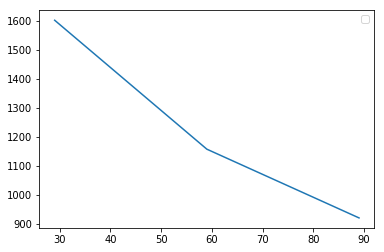

In [25]:
Linear_regression(0.001,100,30)

(30,)


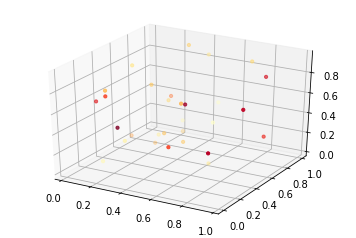

In [26]:
import numpy as np
import numpy

rng = numpy.random
import tensorflow as tf

import matplotlib
from mpl_toolkits.mplot3d import Axes3D
number_of_datapoints = 30
x = np.random.rand(number_of_datapoints)
y = np.random.rand(number_of_datapoints)
z = np.random.rand(number_of_datapoints)
print(z.shape)
count_min = 1
count_max = 187
data = np.random.randint(count_min, count_max, number_of_datapoints) # these are your counts

#%% Create Color Map
colormap = plt.get_cmap("YlOrRd")
norm = matplotlib.colors.Normalize(vmin=min(data), vmax=max(data))

#%% 3D Plot
fig = plt.figure()
ax3D = fig.add_subplot(111, projection='3d')
ax3D.scatter(x, y, z, s=10, c=colormap(norm(data)), marker='o')  
plt.show()

                                                   Part 2
1. Display the graph of decreasing cost function against learning rate and epoch.
2. Compare time complexity of all the three approach.
3. Start with random values of $\theta_1$ & $\theta_0$ and analyse best approach for initial values of $\theta_1$ & $\theta_0$.

                                                   Part 3
1. Write analysis on how optimization was improved.
2. Implement one more new cost function.



1)
When the initial values of the paremeters assgiend 0's
Linear_regression_0(0.01,500,10)=>cost function =116.66976 W= 3.343389 b= 54.004677 
from the we can interprit that cost function decreasing towards the global minimum.
As the the initial parameters were 0's so it take more time to converge.



3)
                 
	learning_rate=0.5  learning_rate=0.5	learning_rate=0.5	learning_rate=0.05	learning_rate=0.005
	epoches=100	   epoches=500		epoches=1000		epoches=500		epoches=1000
	display_test=50    display_test=50	display_test=50		display_test=50		display_test=50

cost     17.651213 		17.5648		17.5648			15.2196			115.57
W	 -4.4432645 		-6.11069	-6.11069		-5.59852		3.342
b	 80.784065		84.6776		84.677			84.971177		54.184


From the above results and the graph generated we can conclude that

1) As the learning rate is very small their is a smooth decrease in the cost.
   And the cost function goes on decresing slowly. It require more
   number of epoches to get trained properlly.it take less time to converge the convex fuvction.

2) When the learning rate is large ,we can see their is decrease in the
   cost function very fast,so it can minimize the cost in very few 
   epoches.It take less time to converge the convex fuvction.


4)
Stop the iterations when error falls below threshold.
The threshold which we set was if the change in the cost function at each iteration is less than 0.0005.
the result which i got is   
Linear_regression_thres(0.05,1000,50)  Training cost= 15.159282 W= -5.7960925 b= 85.687386

      							  part 2

  
1) When we are running on a high number of epoches ,we can see from the graph that their is 
     constant cost maintaing for large number of epoches.at this time we need set some threshould and break them
   We should always look at the graph when we implement the gradient decent so that we will comt to know  weather 
     the cost function is decreasing or yet to be decreased in furter epoches.

2)
The time complexity of the gradient decent can not be said directly it always depends on the intalization of the parameters,
learning rate,data set,and the how the cost function looks like.
In SGD, because it’s using only one example at a time,we need to stuffle the data before optimization so that we can get different type of data at each retrival.
Its path to the minima is noisier (more random) than that of the batch gradient.
But it’s ok as we are indifferent to the path, as long as it gives us the minimum AND the shorter training time.
when the training data set is large enough, stochastic gradient descent only requires a small number of iterations 
to find useful solutions such that the total computational cost is lower than that of gradient descent even for just one iteration. 

3)
This is not true, depending on the initial condition, gradient descent may end up at different local optima.Most of them prefer to initalize 
the parameters with random values insted of zero the magnitudes of the update is huge. But as it approaches the optimum, then the algorithm will find little need 
to update the parameters, and therefore, the value of the cost does not change much. This matches the behavior it had with our simple equation example in the Getting Started with Gradient Descent section.
